In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

#!pip install twint
import twint
#import nest_asyncio
#nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [4]:
ratings = pd.read_csv('rates.csv')


In [11]:
ratings.head(2)

,user_id,follow_id,rate
0,@POTUS,VP,0.083333
1,@POTUS,WhiteHouse,0.083333


In [7]:
movies = pd.read_csv('LDA_final.csv')


In [10]:
movies.head(2)

,id,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23
0,@johnelway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,@Sting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
ratings.drop('Unnamed: 0',axis=1,inplace=True)
movies.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
# Get summary statistics of rating
ratings['rate'].describe()

count    8409.000000
mean        0.072541
std         0.028140
min         0.000000
25%         0.066667
50%         0.071429
75%         0.071429
max         1.000000
Name: rate, dtype: float64

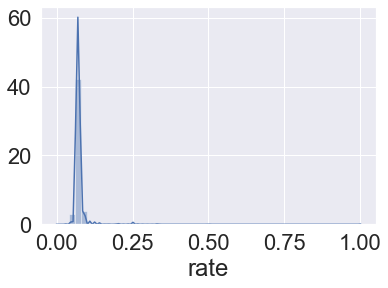

In [15]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rate'].fillna(ratings['rate'].median()))

In [21]:
ratings.head(2)

,user_id,follow_id,rate
0,@POTUS,VP,0.083333
1,@POTUS,WhiteHouse,0.083333


In [20]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['follow_id'] = ratings['follow_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rate'] = ratings['rate'].fillna(ratings['rate'].mean())

In [22]:
# Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.2)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 6565 to 6333
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1682 non-null   object 
 1   follow_id  1682 non-null   object 
 2   rate       1682 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.6+ KB
None


In [30]:
#from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(small_data, test_size=0.2)

In [25]:
from sklearn.model_selection import cross_validate

In [28]:
from sklearn import model_selection as cv


In [55]:
# Create two user-item matrices, one for training and another for testing

#train_data_matrix = train_data.as_matrix(columns = ['user_id', 'follow_id', 'rate'])
#test_data_matrix = test_data.as_matrix(columns = ['user_id', 'follow_id', 'rate'])

# Check their shape
print(train_data.shape)
print(test_data.shape)

(1345, 3)
(337, 3)


In [45]:
#Ratings = ratings.pivot(index = 'user_id', columns ='follow_id', values = 'rate').fillna(0)
#Ratings.head()

In [47]:
movies.head(2)

,id,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23
0,@johnelway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,@Sting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
ratings.head(2)

,user_id,follow_id,rate
0,@POTUS,VP,0.083333
1,@POTUS,WhiteHouse,0.083333


In [75]:
ratings=pd.DataFrame(ratings)

In [53]:
train_data=pd.DataFrame(train_data)

In [61]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.follow_id.unique().shape[0]
print( 'Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 62 | Number of movies = 5918


In [77]:
#Ratings = ratings.pivot(index = aa, columns =bb, values =cc).fillna(0)
#Ratings.head()

In [78]:
ratings_df = pd.pivot_table(ratings, index='user_id', columns='follow_id', values='rate')

In [99]:
ratings_df.head(10)

follow_id,0,10AJMcCarron,19fredlynn,19thnews,1Password,1a,1stArmoredDiv,20thcentury,21WIRE,23_is_leland,...,yvonnie,zammit_marc,zaynmalik,zeldawilliams,zillow,zionkelly18,zittokabwe,zoecello,zoegberg,zynga
user_id,,,,,,,,,,,,,,,,,,,,,
@AfricanGual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0
@BGutiier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@BobPersis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@Brian_TCorbett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@CasperMontoya13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@Chris72436709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@Christi49714219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@ClydeSenpai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,...,0.071429,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@EarlyWatchWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [80]:
ratings.head(2)

,user_id,follow_id,rate
0,@POTUS,VP,0.083333
1,@POTUS,WhiteHouse,0.083333


In [81]:
def cleaningText(text):
    text = str(text)
    text = re.sub(r"[@]+", ' ', text)

    text = text.replace('\n', '') # replace new line into space
#    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
#    text = text.strip(' ') # remove characters space from both left and right text
    return text

In [82]:
movies['id'] = movies['id'].apply(cleaningText)

In [83]:
movies.head(2)

,id,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23
0,johnelway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,Sting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
ratings_df.shape

(62, 5918)

In [86]:
#R = ratings_df.as_matrix()
#user_ratings_mean = np.mean(R, axis = 1)
#Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [ ]:
df_movies_ratings=pd.merge(df_movies, df_ratings)


In [96]:
movie_similarity = 1 - pairwise_distances( y, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.000000,0.015777,0.024453,0.028345,0.009753,0.015777,0.049208,0.012673,0.044418,0.023185,...,0.0,0.010911,0.061364,0.056887,0.0,0.017708,0.015256,0.0,0.0,0.0
1,0.015777,0.000000,0.042862,0.089277,0.040263,0.222222,0.097842,0.068464,0.046927,0.051952,...,0.0,0.000000,0.032926,0.017536,0.0,0.086887,0.080579,0.0,0.0,0.0
2,0.024453,0.042862,0.000000,0.035995,0.040134,0.042862,0.037406,0.038672,0.040581,0.020041,...,0.0,0.000000,0.102036,0.100119,0.0,0.032320,0.040705,0.0,0.0,0.0
3,0.028345,0.089277,0.035995,0.000000,0.031538,0.098246,0.084528,0.083621,0.143124,0.060533,...,0.0,0.000000,0.038622,0.073387,0.0,0.034042,0.030356,0.0,0.0,0.0
4,0.009753,0.040263,0.040134,0.031538,0.000000,0.040263,0.039857,0.077856,0.025807,0.018826,...,0.0,0.000000,0.000000,0.029398,0.0,0.030360,0.036069,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.017708,0.086887,0.032320,0.034042,0.030360,0.043444,0.055090,0.041224,0.031803,0.040626,...,0.0,0.000000,0.024828,0.083922,0.0,0.000000,0.031506,0.0,0.0,0.0
58,0.015256,0.080579,0.040705,0.030356,0.036069,0.080579,0.032354,0.024825,0.050670,0.037677,...,0.0,0.000000,0.000000,0.026324,0.0,0.031506,0.000000,0.0,0.0,0.0
59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0


In [88]:
ratings_df.fillna( 0, inplace = True )
ratings_df.shape

(62, 5918)

In [91]:
y = ratings_df.values

In [95]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
ratings_df

follow_id,0,10AJMcCarron,19fredlynn,19thnews,1Password,1a,1stArmoredDiv,20thcentury,21WIRE,23_is_leland,...,yvonnie,zammit_marc,zaynmalik,zeldawilliams,zillow,zionkelly18,zittokabwe,zoecello,zoegberg,zynga
user_id,,,,,,,,,,,,,,,,,,,,,
@AfricanGual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0
@BGutiier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@BobPersis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@Brian_TCorbett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@CasperMontoya13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
@salty_abstract,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@sandralowe62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
@susannmariee6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [106]:
a=str('@POTUS')
for i in range(62):
    b=str(ratings_df[i])
    if(b==a):
        print(i)

KeyError: 1

In [114]:
k=pd.DataFrame(ratings_df)

In [124]:
k.head(60)

follow_id,0,10AJMcCarron,19fredlynn,19thnews,1Password,1a,1stArmoredDiv,20thcentury,21WIRE,23_is_leland,...,yvonnie,zammit_marc,zaynmalik,zeldawilliams,zillow,zionkelly18,zittokabwe,zoecello,zoegberg,zynga
user_id,,,,,,,,,,,,,,,,,,,,,
@AfricanGual,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.0000,0.000000
@BGutiier,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@BobPersis,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@Brian_TCorbett,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@CasperMontoya13,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@Chris72436709,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@Christi49714219,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@ClydeSenpai,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.071429,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
@EarlyWatchWI,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [121]:
ratings_matrix_items.head(23)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.000000,0.015777,0.024453,0.028345,0.009753,0.015777,0.049208,0.012673,0.044418,0.023185,...,0.0,0.010911,0.061364,0.056887,0.0,0.017708,0.015256,0.0,0.0,0.000000
1,0.015777,0.000000,0.042862,0.089277,0.040263,0.222222,0.097842,0.068464,0.046927,0.051952,...,0.0,0.000000,0.032926,0.017536,0.0,0.086887,0.080579,0.0,0.0,0.000000
2,0.024453,0.042862,0.000000,0.035995,0.040134,0.042862,0.037406,0.038672,0.040581,0.020041,...,0.0,0.000000,0.102036,0.100119,0.0,0.032320,0.040705,0.0,0.0,0.000000
3,0.028345,0.089277,0.035995,0.000000,0.031538,0.098246,0.084528,0.083621,0.143124,0.060533,...,0.0,0.000000,0.038622,0.073387,0.0,0.034042,0.030356,0.0,0.0,0.000000
4,0.009753,0.040263,0.040134,0.031538,0.000000,0.040263,0.039857,0.077856,0.025807,0.018826,...,0.0,0.000000,0.000000,0.029398,0.0,0.030360,0.036069,0.0,0.0,0.000000
5,0.015777,0.222222,0.042862,0.098246,0.040263,0.000000,0.049627,0.034232,0.115753,0.103905,...,0.0,0.000000,0.000000,0.036242,0.0,0.043444,0.080579,0.0,0.0,0.000000
6,0.049208,0.097842,0.037406,0.084528,0.039857,0.049627,0.000000,0.050080,0.072697,0.023953,...,0.0,0.015262,0.052240,0.096330,0.0,0.055090,0.032354,0.0,0.0,0.000000
7,0.012673,0.068464,0.038672,0.083621,0.077856,0.034232,0.050080,0.000000,0.033820,0.028010,...,0.0,0.000000,0.035142,0.062359,0.0,0.041224,0.024825,0.0,0.0,0.000000
8,0.044418,0.046927,0.040581,0.143124,0.025807,0.115753,0.072697,0.033820,0.000000,0.127288,...,0.0,0.000000,0.045809,0.099837,0.0,0.031803,0.050670,0.0,0.0,0.000000
9,0.023185,0.051952,0.020041,0.060533,0.018826,0.103905,0.023953,0.028010,0.127288,0.000000,...,0.0,0.072659,0.030791,0.042716,0.0,0.040626,0.037677,0.0,0.0,0.000000


In [122]:
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.000000,0.015777,0.024453,0.028345,0.009753,0.015777,0.049208,0.012673,0.044418,0.023185,...,0.0,0.010911,0.061364,0.056887,0.0,0.017708,0.015256,0.0,0.0,0.0
1,0.015777,0.000000,0.042862,0.089277,0.040263,0.222222,0.097842,0.068464,0.046927,0.051952,...,0.0,0.000000,0.032926,0.017536,0.0,0.086887,0.080579,0.0,0.0,0.0
2,0.024453,0.042862,0.000000,0.035995,0.040134,0.042862,0.037406,0.038672,0.040581,0.020041,...,0.0,0.000000,0.102036,0.100119,0.0,0.032320,0.040705,0.0,0.0,0.0
3,0.028345,0.089277,0.035995,0.000000,0.031538,0.098246,0.084528,0.083621,0.143124,0.060533,...,0.0,0.000000,0.038622,0.073387,0.0,0.034042,0.030356,0.0,0.0,0.0
4,0.009753,0.040263,0.040134,0.031538,0.000000,0.040263,0.039857,0.077856,0.025807,0.018826,...,0.0,0.000000,0.000000,0.029398,0.0,0.030360,0.036069,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.017708,0.086887,0.032320,0.034042,0.030360,0.043444,0.055090,0.041224,0.031803,0.040626,...,0.0,0.000000,0.024828,0.083922,0.0,0.000000,0.031506,0.0,0.0,0.0
58,0.015256,0.080579,0.040705,0.030356,0.036069,0.080579,0.032354,0.024825,0.050670,0.037677,...,0.0,0.000000,0.000000,0.026324,0.0,0.031506,0.000000,0.0,0.0,0.0
59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0


In [123]:
ratings_matrix_items.to_csv('rt.csv')

In [66]:
aa=Ratings['user_id']
bb=Ratings['follow_id']
cc=Ratings['rate']

In [59]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
#user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
#user_correlation[np.isnan(user_correlation)] = 0.0
#print(user_correlation[:4, :4])

In [71]:
Ratings

,user_id,follow_id,rate
0,@POTUS,VP,0.083333
1,@POTUS,WhiteHouse,0.083333
2,@POTUS,FLOTUS,0.083333
3,@POTUS,PressSec,0.083333
4,@POTUS,PressSec,0.083333
...,...,...,...
8404,@sandralowe62,LesDennis,0.200000
8405,@sandralowe62,LizMcClarnon,0.200000
8406,@sandralowe62,TheLouisEmerick,0.200000
8407,@sandralowe62,POTUS,0.200000
